# Computational Statistics - TP 2 - LACOMBE Yoach

## Exercise 1
### Question 1

With the notation of the exercise, without loss of generality, we can suppose that the $(x_i)_i$ are in an increasing order. 

Then the pdf of X is on $\mathbb{R}$:
$$f(x) =  \sum_{i=1}^np_i\delta_{x_i}$$
Which gives the following cdf on ]0,1[:
$$F(x) =  \sum_{i=1}^np_i \mathbb{1}_{x\geq x_i} $$

With some computations (and by drawing the graph of the cdf), I arrived at: 
$$F(u)^{-1} =  \sum_{i=1}^nx_i \mathbb{1}_{u\in ]\sum_{k=1}^{i-1}p_k, \sum_{k=1}^{i}p_k]}$$

So to generate the r.v X, we simulate on U following the continuous uniform law on [0,1], then we compute $X = F^{-1}(U)$ (as seen in the course).

### Question 2

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def generate_X(xs, ps, nb =  1000):
  '''
  xs and ps are numpy arrays
  xs : n distinct real numbers
  ps : n distinct positive numbers summing to 1
  nb : number of samples drawn
  '''

  #first, sort the value
  arg_index = np.argsort(xs)
  xs = xs[arg_index]
  ps = ps[arg_index]
  
  #draw nb samples from uniform law
  us = np.random.uniform(size = nb)

  #compute the inverse of the CDF, here I use computation tricks, I hope it is faster
  cumsum_ps = np.cumsum(ps)
  cumsum_ps = np.tile(cumsum_ps,(nb,1))
  
  samples_index = np.sum(cumsum_ps <= us[:, np.newaxis], axis = 1)
  samples = xs[samples_index]

  return samples

### Question 3

First I'll try that with a bernoulli distribution, then with more complexe X.

1. X = [5,10], Proba = [0.2, 0.8]

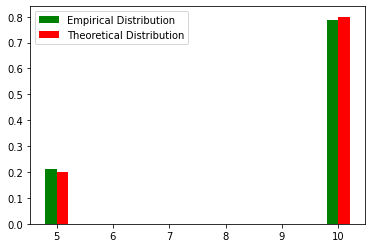

In [2]:
#generate xs and ps

p = np.array([0.2,0.8])
X = np.array([5,10])

samples = generate_X(X, p, nb = 1500)


def plot_samples(samples, X, p):
  x,y = np.unique(samples, return_counts=True)
  plt.bar(x-0.1,y/np.sum(y),width=0.2, color='g', align='center', label = 'Empirical Distribution')

  plt.bar(X+0.1,p,width=0.2, color='r', align='center', label = 'Theoretical Distribution')
  plt.legend()
  plt.show()

plot_samples(samples, X, p)

2. n = 20, random X , random Proba

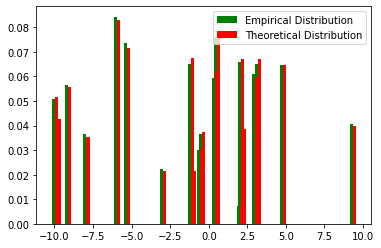

In [3]:
#generate xs and ps
n = 20

p = np.random.uniform(size = n)
p = p/np.sum(p)


X = np.random.uniform(-10, 10, size = n)

samples = generate_X(X, p, nb = n*1500)


plot_samples(samples, X, p)

**Note:** It seems to work quite well.

## Exercise 2

### Question 1

We already answered that in classroom, I will recall the results.

$$\theta = (\mu_1, ..., \mu_m, Σ_1, ..., Σ_, \alpha)$$

$$ \mathcal{L}((x_i)_i, \theta) = \prod_{i=1}^n \sum_{k=1}^m \alpha_k \mathcal N(x_i, \mu_k, Σ_k)$$

### Question 2

1. Sample Z thanks to the previous exercise with $x_k =k$ and $p_k = \alpha_k$.
2. Sample X from $\mathcal N(\mu_j, Σ_j)$ where j = Z.

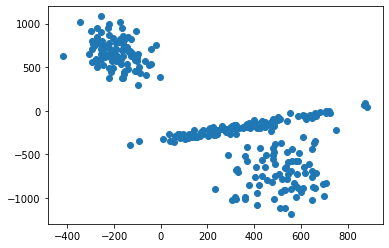

In [24]:

n = 3
#n clusters


#define gaussian vectors law

mus = np.random.uniform(-1000, 1000, size = (2, n))

Ls = [ np.tril(np.random.uniform(-100, 100, size = (2, 2))) + 105*np.identity(2) for i in range(n)]

#lower triangular matrix with positive diagonales


#STEP 1
p = np.random.uniform(size = n)
p = p/np.sum(p)


X = np.arange(n) + 1

samples_Z = generate_X(X, p, nb = n*100)


#STEP 2
samples = [ Ls[k-1]@np.random.multivariate_normal(np.zeros(2), np.identity(2))   + mus[:,k-1] for k in samples_Z]
samples = np.array(samples)


plt.scatter(samples[:,0], samples[:,1])






### Question 3

**E step:**  $$Q(θ, \theta_t) = \sum_{i \in [1,...,N]} \mathbb{E}_{f(Z_i|X_i,\theta_t)}(log f_\theta (X_i, Z_i,\theta))$$

$$ =\sum_{i=1}^n \sum_{k=1}^m f(Z_i = k|X_i,\theta_t) log f_\theta(X_i, k)$$

We have (since $f_\theta(X_i, k) = \alpha_k \mathcal N(x_i, \mu_k, Σ_k)$: 
$$log f_\theta(X_i, k) = -log(det Σ_k)/2 - (x_i - \mu_k)^TΣ_k^{-1}(x_i - \mu_k)/2 + log \alpha_k  + C $$
where C is a constant.

Let's note $f(Z_i = k|X_i,\theta_t) = τ_i^k $.

$$τ_i^k = f(X_i|Z_i = k,\theta_t)f(Z_i = k|\theta_t)/f(X_i|\theta_t)$$
$$ =  \mathcal N(x_i, \mu_k^t, Σ_k^t) \alpha_k^t/f(X_i|\theta_t)$$

Note that $f(X_i|\theta_t)$ is a normalization constant we can easily compute (sum over k).

So 
$$Q(θ, \theta_t) = \sum_{i=1}^n \sum_{k=1}^m τ_i^k [-log(det Σ_k)/2 - (x_i - \mu_k)^TΣ_k^{-1}(x_i - \mu_k)/2 + log \alpha_k  + C]$$

**M step:** We seek to compute the argmax of Q.


For k in [1,...m] :

$\nabla_{\mu_k} Q(θ, \theta_t) = \sum_i τ_i^k Σ_k^{-1}(x_i - \mu_k) = 0  $ i.i.f. 
$$ \mu_k = \sum_i τ_i^k x_i / (\sum_i τ_i^k) $$

$\nabla_{\Sigma_k^{-1}} Q(θ, \theta_t) = \sum_i τ_i^k [Σ_k/2 - (x_i - \mu_k)(x_i - \mu_k)^T/2]= 0  $ i.i.f. 
$$ \Sigma_k = \sum_i τ_i^k  (x_i - \mu_k)(x_i - \mu_k)^T / (\sum_i τ_i^k) $$

**Interpretation:** $\mu_k$ and $\Sigma_k$ are weighted sum of the sample estimators where the weights indicates the likelihood for a sample to be in the k-th cluster.

Finally, maximizing according to $\alpha$ can be seen as minimizing the KL divergence according to the distribution $(\sum_{i=1}^n \tau_i^k/n)_k$. Indeed 
$$\sum_{i=1}^n \sum_{k=1}^m τ_i^klog \alpha_k =  - n \sum_{k=1}^m - log \alpha_k (\sum_{i=1}^n τ_i^k/n)$$

So maximizing this part is equivalent to minimizing: $$KL((\sum_{i=1}^n \tau_i^k/n)_k || \alpha_k)$$
(because both are probability measures).

At the end of the day, this quantity is minimize if the two probability measures are equal.

So when $ \alpha_k = \sum_{i=1}^n \tau_i^k/n$.


**Conclusion:** 
$$ \mu_k = \sum_i τ_i^k x_i / (\sum_i τ_i^k) $$
$$ \Sigma_k = \sum_i τ_i^k  (x_i - \mu_k)(x_i - \mu_k)^T / (\sum_i τ_i^k) $$
$$ \alpha_k = \sum_{i=1}^n \tau_i^k/n$$


In [25]:
from scipy.special import logsumexp


def EM_algorithm(samples, n, d = 2, minimum_step = 2000, plotBool = True, stopping_criterion = 1e-3, logevery = 200):
  '''
  n : number of clusters
  d : dimension of X
  samples: np.array of shape (nb_samples, d)
  '''


  candidate_mus = [np.mean(samples, axis = 0) + np.std(samples)*np.random.multivariate_normal(np.zeros(d), np.identity(d)) for i in range(n)]
  candidate_mus = np.array(candidate_mus).T
  candidate_Ls = np.array([np.random.uniform(0,np.std(samples))* np.identity(d) for i in range(n)])
  candidate_sigmas = np.array([ L@L.T for L in candidate_Ls])

  log_likelihoods = []

  candidate_alphas = np.random.uniform(size = n)
  candidate_alphas = candidate_alphas/np.sum(candidate_alphas)
  #we're taking log proba
  candidate_alphas = np.log(candidate_alphas)

  #var = multivariate_normal(mean=np.zeros(d), cov=np.identity(d))

  constante =  d*len(samples)*np.log(2*np.pi)/2
  def give_log_likelihood_and_taus(candidate_Ls,  candidate_mus, candidate_alphas):
    '''
    return taus (nb_samples, nb_clusters), log_likelihood
    '''
    int_comput =candidate_mus[np.newaxis, :,:] - samples[:,:,np.newaxis]
    #shape is nb_samples,d, n_clusters  (nb_samples,d, n)

    Ls_inverse = np.linalg.inv(candidate_Ls+1e-5*np.identity(d)[np.newaxis,:,:])
    #shape (n, d, d)
  
    compute_help = np.matmul(Ls_inverse[np.newaxis,:,:,:],np.transpose(int_comput[:,:,:,np.newaxis],axes = (0,2,1,3)))

    taus = candidate_alphas - d/2*np.log(2*np.pi) - (np.linalg.slogdet(candidate_Ls+1e-3*np.identity(d)[np.newaxis,:,:])[1])- np.einsum('ijkl,ijkl->ij', compute_help,compute_help)/2
    #taus must be (nb_samples, n)
    

    lg = np.sum(logsumexp(taus, axis = 1))
    taus = taus - logsumexp(taus, axis = 1)[:,np.newaxis]

    return taus, lg , int_comput

  
  j = 0
  continueBool = True
  while j<minimum_step or continueBool:
    #tools 

    log_taus, log_likelihood, int_comput = give_log_likelihood_and_taus(candidate_Ls,  candidate_mus, candidate_alphas)
    
    normalization = np.exp(logsumexp(log_taus, axis = 0))

    candidate_alphas = logsumexp(log_taus, axis = 0, b = 1/len(samples))
    candidate_mus = np.sum( np.squeeze(np.exp(log_taus.T)[:,:,np.newaxis] * samples[np.newaxis,:,:]) ,axis=1).T/(normalization+1e-5)

    
    candidate_sigmas = np.sum(np.einsum('ijk,ilk->ikjl', int_comput*np.exp(log_taus)[:,np.newaxis,:],int_comput) ,axis = 0)/(normalization[:,np.newaxis,np.newaxis]+1e-5)
    candidate_Ls = np.linalg.cholesky(candidate_sigmas+1e-5*np.identity(d)[np.newaxis,:,:])

    if j%logevery == 0 and plotBool:
      print(j, log_likelihood, np.exp(log_likelihood))

    log_likelihoods.append(log_likelihood)
    
    j+=1
    if j>=minimum_step:
      continueBool = np.abs(log_likelihood - log_likelihoods[-2])>stopping_criterion



  if plotBool:
    plt.plot(log_likelihoods)
    plt.show()


  return log_likelihoods, candidate_mus, candidate_sigmas, candidate_Ls, candidate_alphas   



Reminder:
$$τ_i^k = \mathcal N(x_i, \mu_k^t, Σ_k^t) \alpha_k^t/f(X_i|\theta_t)$$
$$ \mu_k = \sum_i τ_i^k x_i / (\sum_i τ_i^k) $$
$$ \Sigma_k = \sum_i τ_i^k  (x_i - \mu_k)(x_i - \mu_k)^T / (\sum_i τ_i^k) $$
$$ \alpha_k = \sum_{i=1}^n \tau_i^k/n$$

$$ lg = \sum_i log \sum_k\mathcal N(x_i, \mu_k^t, Σ_k^t) \alpha_k^t = \sum_i log \sum_kτ_i^kf(X_i|\theta_t)$$


In [26]:
def iterate_EM(samples, n, d = 2, minimum_step = 4000, plotBool = True, stopping_criterion = 1e-3, nb_iterations = 5, logevery = 200):
  log_likelihood = np.NINF

  for i in range(nb_iterations):
    log_likelihoods, candidate_mus, candidate_sigmas, candidate_Ls, candidate_alphas = EM_algorithm(samples, n, d = d, minimum_step = minimum_step, plotBool = plotBool, stopping_criterion = stopping_criterion, logevery = logevery)
    if log_likelihoods[-1] > log_likelihood:
      log_likelihood = log_likelihoods[-1]
      mus = candidate_mus
      sigmas = candidate_sigmas
      Ls = candidate_Ls
      alphas = candidate_alphas
  
  return log_likelihood,mus,sigmas,Ls, alphas



### Test sur les samples précédents


0 -4805.651829129167 0.0
200 -3960.948602582242 0.0
400 -3960.948602582242 0.0


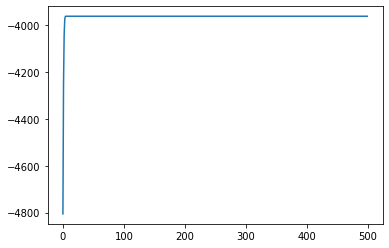

0 -4804.015614249157 0.0
200 -3960.948602582242 0.0
400 -3960.948602582242 0.0


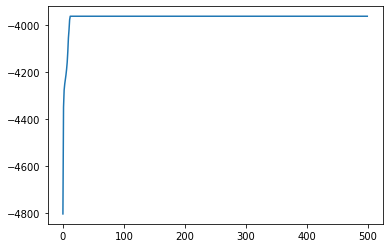

0 -4777.369286800031 0.0
200 -3960.948602582242 0.0
400 -3960.948602582242 0.0


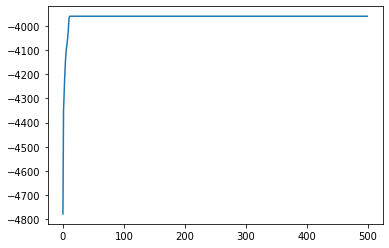

0 -4705.072724403413 0.0
200 -4153.71335112507 0.0
400 -4153.71335112507 0.0


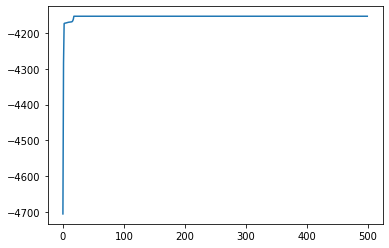

0 -4607.189997350669 0.0
200 -3960.9486025822425 0.0
400 -3960.9486025822425 0.0


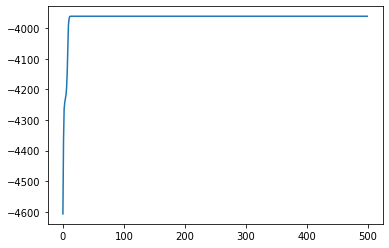

0 -4864.834945536206 0.0
200 -3960.9486025822425 0.0
400 -3960.9486025822425 0.0


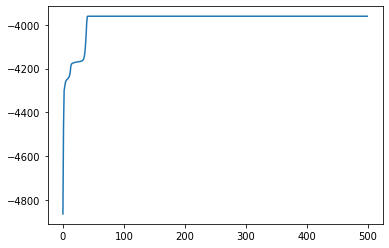

0 -5261.047165842276 0.0
200 -4135.571181224099 0.0
400 -4135.571181224099 0.0


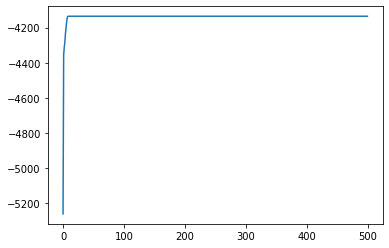

0 -5337.11601546484 0.0
200 -4291.865329474856 0.0
400 -4291.865329474855 0.0


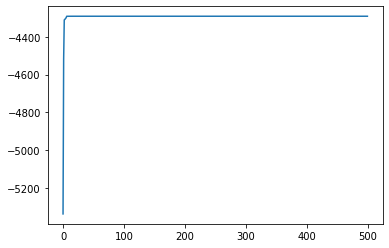

0 -4623.390352409957 0.0
200 -3960.9486025822425 0.0
400 -3960.9486025822425 0.0


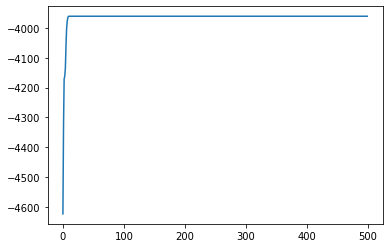

0 -4725.055770175011 0.0
200 -3960.948602582242 0.0
400 -3960.948602582242 0.0


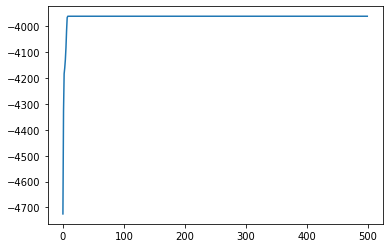

0 -5281.0186144422805 0.0
200 -3960.948602582242 0.0
400 -3960.948602582242 0.0


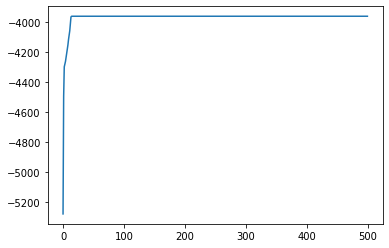

0 -5223.6809726048905 0.0
200 -4329.723399174827 0.0
400 -4329.723399174827 0.0


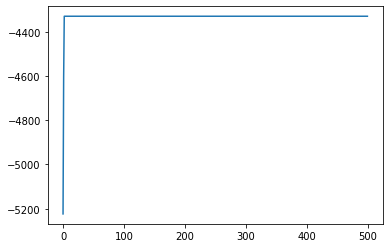

0 -5130.899606212742 0.0
200 -4132.792386220952 0.0
400 -4132.792386220952 0.0


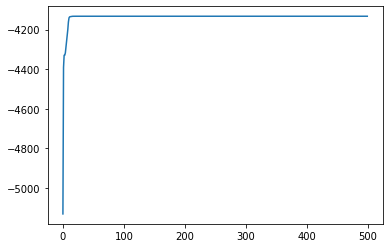

0 -5718.125214097756 0.0
200 -3960.9486025822425 0.0
400 -3960.9486025822425 0.0


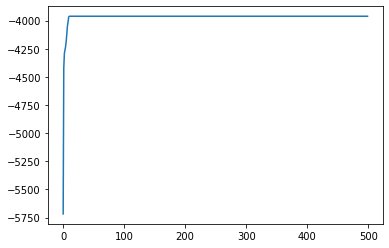

0 -5345.730459836343 0.0
200 -3960.9486025822425 0.0
400 -3960.9486025822425 0.0


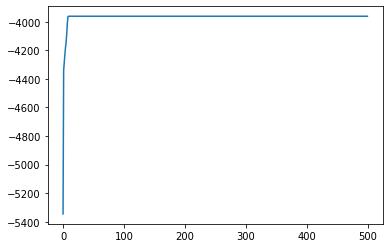

0 -4880.186412869874 0.0
200 -4173.263771369091 0.0
400 -4173.263771369091 0.0


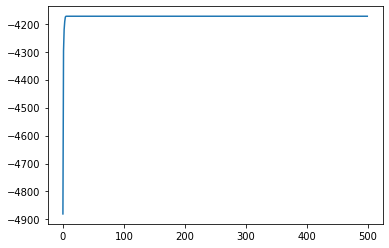

0 -4950.0504034261885 0.0
200 -3960.948602582242 0.0
400 -3960.948602582242 0.0


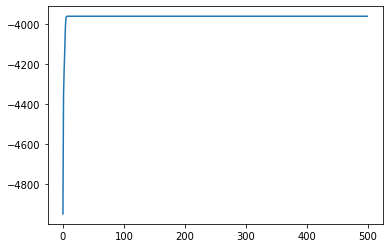

0 -4888.787047206968 0.0
200 -4173.263771369091 0.0
400 -4173.263771369091 0.0


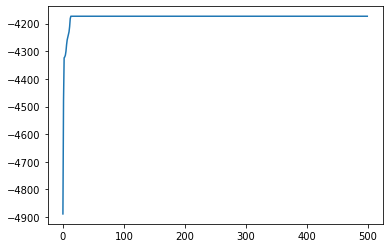

0 -4888.243592100334 0.0
200 -4171.829213243228 0.0
400 -4171.828595291234 0.0


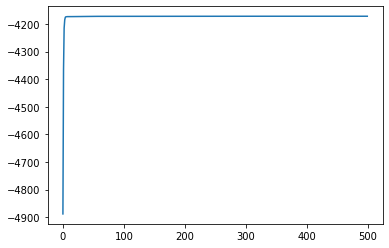

0 -6147.990546456563 0.0
200 -4317.772010797836 0.0
400 -4317.772010797836 0.0


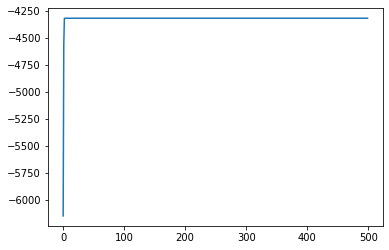

In [27]:
np.seterr(divide='raise', invalid='raise')

log_likelihood,mus_pred,sigmas_pred,Ls_pred, alphas_pred = iterate_EM(samples, 3, minimum_step = 500, nb_iterations=20, logevery = 200)

Suite:
Inspiré de https://stackoverflow.com/questions/26999145/matplotlib-making-2d-gaussian-contours-with-transparent-outermost-layer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


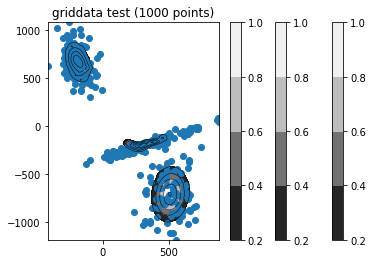

In [28]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
from matplotlib import cm

def gauss(x,y,Sigma,mu):
    X=np.vstack((x,y)).T
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(Sigma)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))

def plot_countour(x,y,z):
    # define grid.
    xi = np.linspace(samples[:,0].min(), samples[:,0].max(), npts, 100)
    yi = np.linspace(samples[:,1].min(), samples[:,1].max(), npts, 100)
    ## grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    #CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.Greys_r, levels=levels)
    plt.colorbar() # draw colorbar
    # plot data points.
    # plt.scatter(x, y, marker='o', c='b', s=5)
    plt.xlim(samples[:,0].min(), samples[:,0].max())
    plt.ylim(samples[:,1].min(), samples[:,1].max())
    plt.title('griddata test (%d points)' % npts)
    #plt.show()


nb_clusters = 3
# make up some randomly distributed data
seed(1234)
npts = 1000
x = uniform(samples[:,0].min(), samples[:,0].max(), npts)
y = uniform(samples[:,1].min(), samples[:,1].max(), npts)

for i in range(nb_clusters):


  z = gauss(x, y, Sigma=sigmas_pred[i], mu=mus_pred[:,i])
  plot_countour(x, y, z)


plt.scatter(samples[:,0], samples[:,1])

plt.show()

In [29]:
print(np.exp(alphas_pred), p)

[0.2757124  0.32666667 0.39762093] [0.29349045 0.39976081 0.30674874]


### Remark
It works well (it converges at the proba are quite right).
However, it seems that there is something wrong with my log-likelihood which is far too low for such a right prediction.

### Question 5

The data is in a banana shape. We could use GMM for approximating this data, although it might not be the best modelisation.

In [10]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd 'My Drive'/

Mounted at /gdrive
/gdrive
/gdrive/My Drive


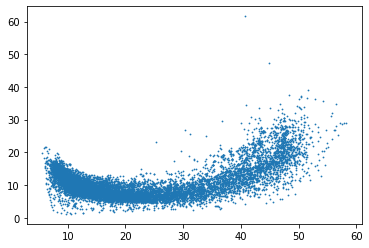

In [13]:
import pandas as pd
df = pd.read_csv('crude_birth_death.csv')
df = df[['CBR', 'CDR']].dropna()

plt.xlabel = 'CBR'
plt.ylabel = 'CDR'
plt.scatter(df.CBR, df.CDR, s = 0.6)
plt.show()

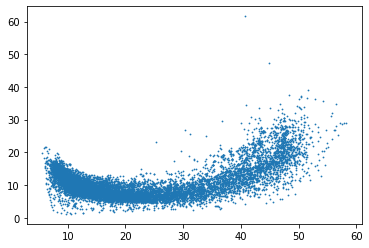

2 79784.79332802632
3 76782.39162504565
4 76066.2431471461
5 75882.336488461
6 75806.21024663009
7 75761.31937278512
8 75735.90450255787
9 75703.04153487145


In [ ]:

for j in range(2,8):
  log_likelihood,mus_pred,sigmas_pred,Ls_pred, alphas_pred =iterate_EM(df.values, j, minimum_step = 100, nb_iterations=20, logevery = 600,
                                                                         plotBool = False)

  BIC = -log_likelihood+np.log(len(df))*(3*j+2*j+j)/2
  print(j,BIC)



In [16]:
nb_clusters = 8
samples = df.values
log_likelihood,mus_pred,sigmas_pred,Ls_pred, alphas_pred =iterate_EM(samples, nb_clusters, minimum_step = 100, nb_iterations=20, logevery = 600,
                                                                         plotBool = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


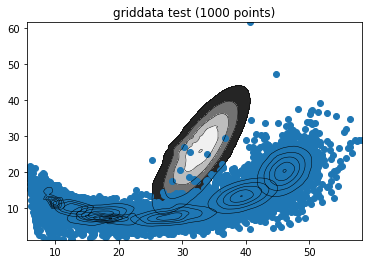

In [18]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
from matplotlib import cm
def gauss(x,y,Sigma,mu):
    X=np.vstack((x,y)).T
    mat_multi=np.dot((X-mu[None,...]).dot(np.linalg.inv(Sigma)),(X-mu[None,...]).T)
    return  np.diag(np.exp(-1*(mat_multi)))

def plot_countour(x,y,z):
    # define grid.
    xi = np.linspace(samples[:,0].min(), samples[:,0].max(), npts, 100)
    yi = np.linspace(samples[:,1].min(), samples[:,1].max(), npts, 100)
    ## grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,len(levels),linewidths=0.5,colors='k', levels=levels)
    #CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    CS = plt.contourf(xi,yi,zi,len(levels),cmap=cm.Greys_r, levels=levels)
    #plt.colorbar() # draw colorbar
    # plot data points.
    # plt.scatter(x, y, marker='o', c='b', s=5)
    plt.xlim(samples[:,0].min(), samples[:,0].max())
    plt.ylim(samples[:,1].min(), samples[:,1].max())
    plt.title('griddata test (%d points)' % npts)
    #plt.show()



# make up some randomly distributed data
seed(1234)
npts = 1000
x = uniform(samples[:,0].min(), samples[:,0].max(), npts)
y = uniform(samples[:,1].min(), samples[:,1].max(), npts)

for i in range(nb_clusters):


  z = gauss(x, y, Sigma=sigmas_pred[i], mu=mus_pred[:,i])
  plot_countour(x, y, z)


plt.scatter(samples[:,0], samples[:,1])

plt.show()

### Note

We see that the BIC score is really low because my computed log-likelihood is really low. So this BIC computation might not help to find the ideal number of cluster.
Note that the big contour we see has a low probability of occurrence.

# Exercise 3

##3.A.1

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 2*np.sin(x*np.pi/1.5)*((x>=0).astype(float))

def p(x):
  return np.power(x, 0.65)*np.exp(-np.power(x,2)/2)*((x>=0).astype(float))

def q(x):
  return 2*np.exp(-np.power(x-0.8,2)/(2*(1.5)))/np.sqrt(3*np.pi)

Procedure:
*   Sample $(X_i)_i$ from $\mathcal N(0.8, 1.5)$ (pdf of q)
*   The quantity researched is $\sum_i p(x_i)f(x_i)/(nq(x_i))$



In [20]:
def importance_sampling(n_samples, mean = 0.8):
  '''
  returns estimate and importance weights
  '''
  X = np.random.normal(mean, 1.5, n_samples)
  mask = X>0
  X  = X[mask]

  return np.mean(f(X)*p(X)/q(X)), p(X)/q(X)


## 3.A.2

nb samples  10 and estimate  0.24032390534956546


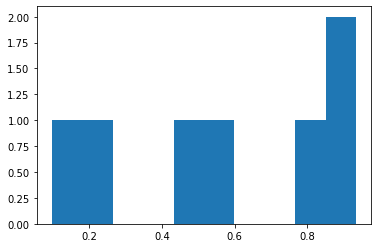

nb samples  100 and estimate  0.12407179354258194


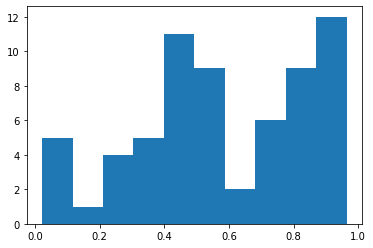

nb samples  100 and estimate  0.3191757293454508


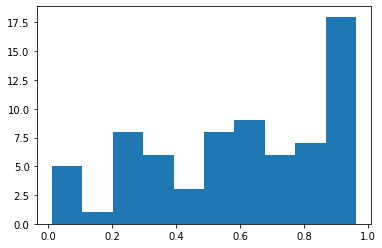

nb samples  1000 and estimate  0.4210602492208098


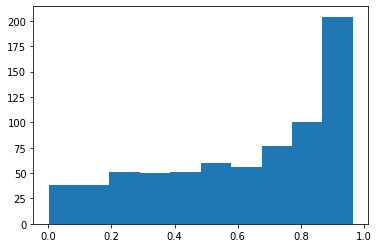

nb samples  10000 and estimate  0.43048755583927056


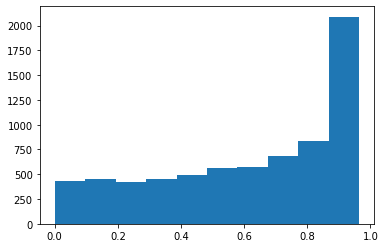

In [19]:
for i in [10, 100, 100, 1000, 10000]:
  estimate, importance_weights = importance_sampling(i)
  print('nb samples ', i, 'and estimate ', estimate)
  plt.hist(importance_weights)
  plt.show()

We clearly that most of the sampes are relevant because the weights are close to 1. It seems to correctly estimate the mean.

## 3.A.3

nb samples  10 and estimate  0.03389822471600125


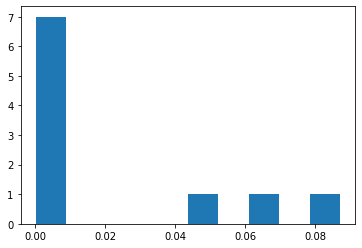

nb samples  100 and estimate  0.010664592271527124


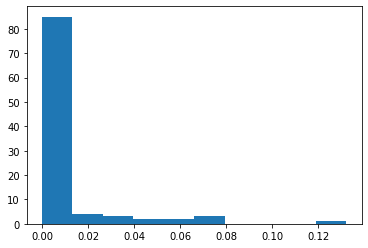

nb samples  100 and estimate  0.006953152507656106


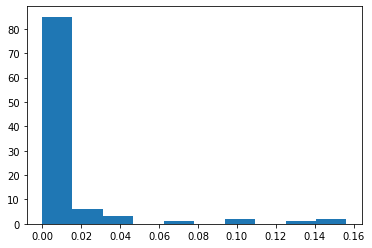

nb samples  1000 and estimate  -0.0003840377989730892


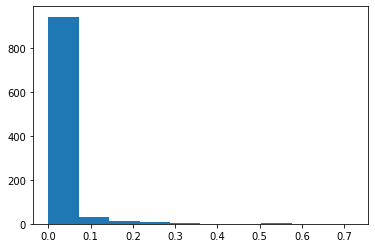

nb samples  10000 and estimate  -0.0005928888717991813


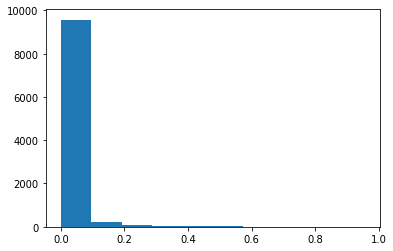

In [21]:
for i in [10, 100, 100, 1000, 10000]:
  estimate, importance_weights = importance_sampling(i, mean = 6)
  print('nb samples ', i, 'and estimate ', estimate)
  plt.hist(importance_weights)
  plt.show()

This time, most of the samples are not used (their weight are close to zeros). It doesn't give a good estimate of what we're looking for.

## 3.B.4

Instead of maximizing $\sum_i log \sum_k\mathcal N(x_i, \mu_k^t, Σ_k^t) \alpha_k^t $, we maximize in (iii):

$$\sum_i \tilde w_i log \sum_k\mathcal N(x_i, \mu_k^t, Σ_k^t) \alpha_k^t $$

which is simply equivalent to weighting the samples by $\tilde w_i$.

So the parameters update is simply (by replacing $τ_i^k$ by $τ_i^k \tilde w_i$:

$$ \mu_k = \sum_i \tilde w_i τ_i^k x_i / (\sum_i τ_i^k) $$
$$ \Sigma_k = \sum_i \tilde w_i τ_i^k  (x_i - \mu_k)(x_i - \mu_k)^T / (\sum_i τ_i^k) $$
$$ \alpha_k = \sum_{i=1}^n \tilde w_i \tau_i^k/n$$



## 3.C.5

Recall:
$\tilde w_i = w_i/\sum_i w_i$ where $w_i = 𝜈(x)/q(x)$.

I did not have the time to finish this exercise.

In [48]:


from scipy.stats import multivariate_normal
from scipy.special import logsumexp
import numpy as np
import pandas as pd

d = 5
sigma = 1
b = 0.4

def banana_density(x, b, sigma):
  mu = np.zeros(x.shape[1])
  cov = np.identity(x.shape[1])
  cov[0,0] = sigma**2

  xx = np.copy(x)
  xx[:, 1]  = xx[:,1] + b*(xx[:,1]**2 - sigma**2) 

  return multivariate_normal.logpdf(xx, mean=mu, cov=cov)


def q_density(x, alphas, mus, Ls):
  '''
  return taus (nb_samples, nb_clusters), log_likelihood
  '''
  int_comput = mus[np.newaxis, :,:] - x[:,:,np.newaxis]
  #shape is nb_samples,d, n_clusters  (nb_samples,d, n)

  Ls_inverse = np.linalg.inv(Ls+1e-5*np.identity(d)[np.newaxis,:,:])
  #shape (n, d, d)

  compute_help = np.matmul(Ls_inverse[np.newaxis,:,:,:],np.transpose(int_comput[:,:,:,np.newaxis],axes = (0,2,1,3)))

  taus = alphas - d/2*np.log(2*np.pi) - (np.linalg.slogdet(Ls+1e-3*np.identity(d)[np.newaxis,:,:])[1])- np.einsum('ijkl,ijkl->ij', compute_help,compute_help)/2
  #taus must be (nb_samples, n)
  

  lg = np.sum(logsumexp(taus, axis = 1))

  return lg


def generate_samples_GMM(nb_samples, alphas, Ls, mus):
  #here alphas is log alphas

  #STEP 1

  X = np.arange(len(alphas))+ 1

  samples_Z = generate_X(X, np.exp(alphas)/np.sum(np.exp(alphas)), nb = nb_samples)


  #STEP 2
  samples = [ Ls[k-1,:,:]@np.random.multivariate_normal(np.zeros(len(alphas)), np.identity(len(alphas)))   + mus[:,k-1] for k in samples_Z]
  samples = np.array(samples)
  return samples



def IMPORTANCE_SAMPLING_algorithm(n, d = 2, minimum_step = 2000, plotBool = True, stopping_criterion = 1e-3, logevery = 200, nb_samples = 500):
  '''
  n : number of clusters
  d : dimension of X
  samples: np.array of shape (nb_samples, d)
  '''


  candidate_mus = [ np.random.multivariate_normal(np.zeros(d), np.identity(d)) for i in range(n)]
  candidate_mus = np.array(candidate_mus).T
  candidate_Ls = np.array([ np.identity(d) for i in range(n)])
  candidate_sigmas = np.array([ L@L.T for L in candidate_Ls])

  log_likelihoods = []

  candidate_alphas = np.random.uniform(size = n)
  candidate_alphas = candidate_alphas/np.sum(candidate_alphas)
  #we're taking log proba
  candidate_alphas = np.log(candidate_alphas)

  def give_log_likelihood_and_taus(samples, candidate_Ls,  candidate_mus, candidate_alphas, log_weights):
    '''
    return taus (nb_samples, nb_clusters), log_likelihood
    '''
    int_comput =candidate_mus[np.newaxis, :,:] - samples[:,:,np.newaxis]
    #shape is nb_samples,d, n_clusters  (nb_samples,d, n)

    Ls_inverse = np.linalg.inv(candidate_Ls+1e-5*np.identity(d)[np.newaxis,:,:])
    #shape (n, d, d)
  
    compute_help = np.matmul(Ls_inverse[np.newaxis,:,:,:],np.transpose(int_comput[:,:,:,np.newaxis],axes = (0,2,1,3)))

    taus = candidate_alphas - d/2*np.log(2*np.pi) - (np.linalg.slogdet(candidate_Ls+1e-3*np.identity(d)[np.newaxis,:,:])[1])- np.einsum('ijkl,ijkl->ij', compute_help,compute_help)/2
    #taus must be (nb_samples, n)
    

    lg = np.sum(logsumexp(taus, axis = 1))

    #####WE ADD LOG WEIGHTS
    taus = taus - logsumexp(taus, axis = 1)[:,np.newaxis] + log_weights[:,np.newaxis]

    return taus, lg , int_comput

  
  j = 0
  continueBool = True
  while j<minimum_step or continueBool:
    #tools 

    samples = generate_samples_GMM(nb_samples, candidate_alphas, candidate_Ls, candidate_mus)

    log_weights = banana_density(samples, b, sigma) - q_density(samples, candidate_alphas, candidate_mus, candidate_Ls)
    log_weights = log_weights - logsumexp(log_weights)

    log_taus, log_likelihood, int_comput = give_log_likelihood_and_taus(samples, candidate_Ls,  candidate_mus, candidate_alphas, log_weights)
    
    normalization = np.exp(logsumexp(log_taus, axis = 0))

    candidate_alphas = logsumexp(log_taus, axis = 0, b = 1/len(samples))
    candidate_mus = np.sum( np.squeeze(np.exp(log_taus.T)[:,:,np.newaxis] * samples[np.newaxis,:,:]) ,axis=1).T/(normalization+1e-5)

    
    candidate_sigmas = np.sum(np.einsum('ijk,ilk->ikjl', int_comput*np.exp(log_taus)[:,np.newaxis,:],int_comput) ,axis = 0)/(normalization[:,np.newaxis,np.newaxis]+1e-5)
    candidate_Ls = np.linalg.cholesky(candidate_sigmas+1e-5*np.identity(d)[np.newaxis,:,:])

    if j%logevery == 0 and plotBool:
      print(j, log_likelihood, np.exp(log_likelihood))

    log_likelihoods.append(log_likelihood)
    
    j+=1
    if j>=minimum_step:
      continueBool = np.abs(log_likelihood - log_likelihoods[-2])>stopping_criterion and j < 500



  if plotBool:
    plt.plot(log_likelihoods)
    plt.show()


  return log_likelihoods, candidate_mus, candidate_sigmas, candidate_Ls, candidate_alphas   